<a href="https://colab.research.google.com/github/kittyofheaven/machine-learning-helper/blob/main/NLP/NLP_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing notebook

In [ ]:
!nvidia-smi

Thu Dec 23 03:55:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/kittyofheaven/machine-learning-helper/main/helper_functions.py
# buat helper function

--2021-12-23 03:55:47--  https://raw.githubusercontent.com/kittyofheaven/machine-learning-helper/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12046 (12K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.76K  --.-KB/s    in 0s      

2021-12-23 03:55:47 (91.5 MB/s) - ‘helper_functions.py’ saved [12046/12046]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
# get text dataset
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2021-12-23 03:55:50--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-12-23 03:55:50 (103 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

#Visualizing datasets

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df

# shuffle the data
train_df_shuffled = train_df.sample(frac=1, random_state=42) #frac = 1 artinya 100% data di shuffle, klo 0.1 ya 10% berarti
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
test_df = pd.read_csv("/content/test.csv")
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# let's visualize some random data 
import random 
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples() :
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0  else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("___\n")


Target: 0 (not real disaster)
Text:
MY GIRL GOT A GIRLFRIEND CHEVY BLUE LIKE WHIRLWIND.

___

Target: 0 (not real disaster)
Text:
@hlportal Hello! I'm looking for mod Cold Ice. I saw it on your site but link to download dead. Maybe you have it and share with me? Thanks.

___

Target: 0 (not real disaster)
Text:
Do you ever just want to obliterate an entire species off the face of the earth? I vote for mosquitoes

___

Target: 0 (not real disaster)
Text:
Hey girl you must be Toe Hobbit: Part Two: ghe Desolation of Smaug because I'm not interested in seeing you. Sorry.

___

Target: 0 (not real disaster)
Text:
Texas Seeks Comment on Rules for Changes to Windstorm Insurer http://t.co/BNNIdfZWbd

___



# Splitting into training and validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_label, val_label = train_test_split(train_df_shuffled["text"].to_numpy(), 
                                                                          train_df_shuffled["target"].to_numpy(),
                                                                          test_size = 0.1, #mean 10%
                                                                          random_state = 42) 
train_sentences, val_sentences, train_label, val_label

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        ...,
        'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
        "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
        "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
       dtype=object),
 array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador

In [ ]:
len(train_sentences), len(val_sentences), len(train_label), len(val_label)

(6851, 762, 6851, 762)

In [ ]:
pd.DataFrame({"text":train_sentences[:10], "target" : train_label[:10]})

,text,target
0,@mogacola @zamtriossu i screamed after hitting...,0
1,Imagine getting flattened by Kurt Zouma,0
2,@Gurmeetramrahim #MSGDoing111WelfareWorks Gree...,1
3,@shakjn @C7 @Magnums im shaking in fear he's g...,0
4,Somehow find you and I collide http://t.co/Ee8...,0
5,@EvaHanderek @MarleyKnysh great times until th...,1
6,destroy the free fandom honestly,1
7,Weapons stolen from National Guard Armory in N...,0
8,@wfaaweather Pete when will the heat wave pass...,1
9,Patient-reported outcomes in long-term survivo...,1


# Convert text into number
with tokenization or embedding


In [ ]:
# Text vectorization
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
# find the average number of tokens (words) in training tweets
round(sum([len(i.split()) for i in train_sentences ])/len(train_sentences))

15

In [ ]:
# setuping the variables
max_vocab_length = 10000 # max number in our vocab, for the rare word will get (OOV) Out Of Vocab
max_length = round(sum([len(i.split()) for i in train_sentences ])/len(train_sentences)) # max length our sequences will be


In [ ]:
from tensorflow.python.keras.layers.preprocessing.text_vectorization import SPLIT_ON_WHITESPACE
from numpy.lib.shape_base import split
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_vocab_length, #how many word in the vocabulary, if capped then for the rare word will get (OOV) Out Of Vocab
                                    standardize="lower_and_strip_punctuation",
                                    split=SPLIT_ON_WHITESPACE,
                                    ngrams=None, # This create a group of n-words
                                    output_mode = 'int', # how to map token to number
                                    output_sequence_length = max_length, # how long fo you want your sequences to be
                                    pad_to_max_tokens = True)

In [ ]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "an emergency earthquake !"
sample_sentence1 = "a big flood coming out !"
text_vectorizer([sample_sentence]), text_vectorizer([sample_sentence1])

(<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
 array([[ 39,  73, 290,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0]])>, <tf.Tensor: shape=(1, 15), dtype=int64, numpy=
 array([[  3, 335, 232, 249,  36,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0]])>)

In [ ]:
# print random sentence from training data and tokenize it 
import random
random_sentence = random.choice(train_sentences)
print(f"Text : ({random_sentence})\nText Vector : {tf.squeeze(text_vectorizer([random_sentence]))}")

Text : (@author_mike Amen today is the Day of Salvation. THX brother Mike for your great encouragement. - http://t.co/cybKsXHF7d Coming US Tsunami)
Text Vector : [   1    1  124    9    2  101    6 3447 1582 1431 3630   10   33  196
 5728]


In [ ]:
# Get the unique words in the vocabulary 
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:5], words_in_vocab[-5:]

(10000,
 ['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

# Create an embedding layer

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length, # the size of our vocabulary
                             input_length = max_length, # length of the sequences that being passed on the layer
                             output_dim = 128 # length of the output vector example 10 will be 10 long list (Outpuy Shape)
                             )
embedding

In [ ]:
# print random sentence from training data and tokenize it then put it on embedding layer
import random
random_sentence = random.choice(train_sentences)

sample_embed = embedding(text_vectorizer([random_sentence]))
print(f"Text : ({random_sentence})\nText Vector : {text_vectorizer([random_sentence])} \nText Embedding : ")
sample_embed

Text : (FYI: ;ACCIDENT PROPERTY DAMAGE;3460 LIMESTONE LN;COL;YELLOWSTONE WAY;FIELDSTONE DR;08/05/2015 19:36:35)
Text Vector : [[3823  128  927    1    1    1 6895    1    1    0    0    0    0    0
     0]] 
Text Embedding : 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01139395,  0.00465685, -0.03448757, ...,  0.00624581,
          0.03822055,  0.02347891],
        [ 0.01457104, -0.0363609 , -0.01754676, ..., -0.02295263,
          0.02245582, -0.02367475],
        [-0.0466857 ,  0.04255397, -0.01960183, ...,  0.04662707,
          0.02826789,  0.00545228],
        ...,
        [ 0.03673256, -0.02776653, -0.04309975, ..., -0.00172127,
          0.03357049, -0.03872796],
        [ 0.03673256, -0.02776653, -0.04309975, ..., -0.00172127,
          0.03357049, -0.03872796],
        [ 0.03673256, -0.02776653, -0.04309975, ..., -0.00172127,
          0.03357049, -0.03872796]]], dtype=float32)>

# START MODELING EXPERIMENT

## Baseline model (model_0)
Naive bayes by sklearn

In [ ]:
# model_0 
# baseline model is important, so you can get a benchmar for ur future model
# we use non-DL program for the baseline machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words into numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# fit the pipeline to the training data
model_0.fit(train_sentences, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0_score = model_0.score(train_sentences, train_label)
print(f"Baseline accuracy : {model_0_score * 100:.3f} %")

Baseline accuracy : 88.717 %


In [ ]:
model_0_score = model_0.score(val_sentences, val_label)
print(f"Baseline accuracy : {model_0_score * 100:.3f} %")

Baseline accuracy : 79.265 %


In [ ]:
pd.set_option('display.max_colwidth', -1)
baseline_predict_df = pd.DataFrame({"sentences" : val_sentences[:20], "predictions" : model_0.predict(val_sentences[:20]) })
baseline_predict_df
# not to bad tho

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,sentences,predictions
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5,1
1,FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday,1
2,Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj,1
3,@camilacabello97 Internally and externally screaming,0
4,Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov,0
5,Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8,1
6,How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd,1
7,Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by SÛ_ http://t.co/JDVSGVhlIs,1
8,Ûª93 blasts accused Yeda Yakub dies in Karachi of heart attack http://t.co/mfKqyxd8XG #Mumbai,1
9,My ears are bleeding https://t.co/k5KnNwugwT,0


In [ ]:
# making function to track & evaluate
# Accuracy, Precision, Recall, F1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def binary_model_evaluation_result(y_true, y_pred):
  # Calculate Accuracy, Precision, Recall, F1-score of a binary classification model
  model_accuracy = accuracy_score(y_true, y_pred)# calculate accuracy 
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted") # calculate Precision, Recall, F1-score
  model_result_dict = {
      "accuracy" : model_accuracy,
      "precision" : model_precision,
      "recall" : model_recall,
      "f1" : model_f1
  }
  return model_result_dict

In [ ]:
from helper_functions import calculate_results # u can use this too if u want

In [ ]:
binary_model_evaluation_result(val_label, model_0.predict(val_sentences))

{'accuracy': 0.7926509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
calculate_results(val_label, model_0.predict(val_sentences))

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Feed Forward Neural Nerwork (model_1)
using dense model

In [ ]:
# create tensorboard callback (create one for each model)
from helper_functions import create_tensorboard_callback
SAVE_DIR = "/content/model_logs"  # create directory to save Tensorboard logs

In [ ]:
# Create a model with functional api
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.dtypes.string) # input 1 dimensional string
x = text_vectorizer(inputs) # change inputs into text vector
x = embedding(x) # change text vector into an embedding
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation=tf.keras.activations.sigmoid)(x) # create an output layer and pass x, and the output will be binary with sigmoid

model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history = model_1.fit(x = train_sentences, 
                              y = train_label,
                              epochs = 5,
                              validation_data = (val_sentences, val_label), 
                              callbacks=[create_tensorboard_callback(dir_name = SAVE_DIR, experiment_name = "model_1_dense")])

Saving TensorBoard log files to: /content/model_logs/model_1_dense/20211223-035555
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.6091 - accuracy: 0.6945 - val_loss: 0.5388 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4410 - accuracy: 0.8175 - val_loss: 0.4724 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3472 - accuracy: 0.8591 - val_loss: 0.4592 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2843 - accuracy: 0.8902 - val_loss: 0.4692 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2377 - accuracy: 0.9127 - val_loss: 0.4807 - val_accuracy: 0.7887


In [ ]:
model_1_predict = tf.squeeze(model_1.predict([val_sentences[:10]])) # below 0.5 = 0, above 0.5 is 1
# so we haveto make it 0 and 1
model_1_predict = tf.round(model_1_predict)


pd.DataFrame({"sentences" : val_sentences[:10], "pred" : model_1_predict})

,sentences,pred
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5,0.0
1,FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday,1.0
2,Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj,1.0
3,@camilacabello97 Internally and externally screaming,0.0
4,Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov,0.0
5,Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8,1.0
6,How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd,1.0
7,Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by SÛ_ http://t.co/JDVSGVhlIs,1.0
8,Ûª93 blasts accused Yeda Yakub dies in Karachi of heart attack http://t.co/mfKqyxd8XG #Mumbai,1.0
9,My ears are bleeding https://t.co/k5KnNwugwT,0.0


In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(model_1.predict(val_sentences))))
# """
# Previous model results
# {'accuracy': 79.26509186351706,
#  'f1': 0.7862189758049549,
#  'precision': 0.8111390004213173,
#  'recall': 0.7926509186351706}
#  """

{'accuracy': 78.87139107611549,
 'f1': 0.7848945056280915,
 'precision': 0.7964015586347394,
 'recall': 0.7887139107611548}

### Visualizing our embedding after deep learning training
https://projector.tensorflow.org
https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:
len(words_in_vocab), words_in_vocab[:10], max_length

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'], 15)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

## Building LSTM RNN (model_2)

In [ ]:
# recurrent neural network, this useful for sequence data
# model_2 LSTM = Long Short term Memory
text_vectorizer, embedding # this our previous layer to convert string into vector
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,) ,dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(units = 128, # the hidden units 
                return_sequences=True)(x) # when youre stacking RNN cells together u have to return sequence to True
x = layers.LSTM(units = 64)(x)
x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
# compile a model
model_2.compile(loss=tf.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_2_history = model_2.fit(train_sentences, train_label,
                              epochs = 5,
                              validation_data=(val_sentences, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")]
                              )

Saving TensorBoard log files to: /content/model_logs/model_2_LSTM/20211223-035611
Epoch 1/5
215/215 [==============================] - 18s 31ms/step - loss: 0.2187 - accuracy: 0.9244 - val_loss: 0.5513 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1567 - accuracy: 0.9415 - val_loss: 0.6087 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1359 - accuracy: 0.9504 - val_loss: 0.8300 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1151 - accuracy: 0.9565 - val_loss: 0.8577 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0948 - accuracy: 0.9653 - val_loss: 1.0439 - val_accuracy: 0.7690


In [ ]:
tf.round(tf.squeeze(model_2.predict(val_sentences)))[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(model_2.predict(val_sentences))))

# Best previous model results 
# {'accuracy': 79.26509186351706,
#  'f1': 0.7862189758049549,
#  'precision': 0.8111390004213173,
#  'recall': 0.7926509186351706}

{'accuracy': 76.9028871391076,
 'f1': 0.7662397121174332,
 'precision': 0.7720661775336959,
 'recall': 0.7690288713910761}

## Building GRU RNN (model_3)

In [ ]:
text_vectorizer, embedding # this our previous layer to convert string into vector
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,) ,dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.LSTM(units = 128, # u can combine LSTM with GRU too
#                 return_sequences=True)(x)
# x = layers.GRU(units = 128, # the hidden units 
#                 return_sequences=True)(x) # when youre stacking RNN cells together u have to return sequence to True
x = layers.GRU(units = 1)(x)

# x = layers.GRU(units = 64, 
#                 return_sequences=True)(x) # if u want to use return sequence True so the shape will be 15,64 
# x = layers.GlobalAveragePooling1D()(x) # u have to add global average pooling so the shape will change to 64

# x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_LSTM")
model_3.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 1)                 393       
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 1,280,395
Trainable params: 1,280,395
Non-trainable params: 0
____________________________________________

In [ ]:
model_3.compile(loss=tf.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_3_history = model_3.fit(train_sentences, train_label,
                              epochs = 5,
                              validation_data=(val_sentences, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")]
                              )

Saving TensorBoard log files to: /content/model_logs/model_3_GRU/20211223-035703
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.6307 - accuracy: 0.7149 - val_loss: 0.5927 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4948 - accuracy: 0.8694 - val_loss: 0.5414 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3973 - accuracy: 0.9095 - val_loss: 0.5268 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3266 - accuracy: 0.9291 - val_loss: 0.5262 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2786 - accuracy: 0.9399 - val_loss: 0.5335 - val_accuracy: 0.7559


In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(model_3.predict(val_sentences))))

# Best previous model results 
# {'accuracy': 79.26509186351706,
#  'f1': 0.7862189758049549,
#  'precision': 0.8111390004213173,
#  'recall': 0.7926509186351706}

{'accuracy': 75.59055118110236,
 'f1': 0.7535524954357875,
 'precision': 0.7573698742202679,
 'recall': 0.7559055118110236}

## Bidirectional RNN (model_4)
normal RNN's go from left to right (its like reading the sequence) meanwhile biderictional RNN's go from left to right and right to left too

In [ ]:
# recurrent neural network, this useful for sequence data
# model_4 Bidirectional LSTM / GRU
text_vectorizer, embedding # this our previous layer to convert string into vector
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,) ,dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional( layer = layers.GRU( # u have to define the layer, u can use LSTM or GRU
                units = 5, # the hidden units 
                return_sequences=True))(x) # when youre stacking RNN cells together u have to return sequence to True
x = layers.Bidirectional(layer = layers.GRU(units = 5))(x)
# x = layers.Dense(64, activation = "relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 10)           4050      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 10)               510       
 nal)                                                            
                                             

In [ ]:
# compile a model
model_4.compile(loss=tf.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_4_history = model_4.fit(train_sentences, train_label,
                              epochs = 15,
                              validation_data=(val_sentences, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_Bidirectional")]
                              )

Saving TensorBoard log files to: /content/model_logs/model_4_Bidirectional/20211223-035717
Epoch 1/15
215/215 [==============================] - 13s 29ms/step - loss: 0.6412 - accuracy: 0.6386 - val_loss: 0.6471 - val_accuracy: 0.6155
Epoch 2/15
215/215 [==============================] - 5s 22ms/step - loss: 0.5747 - accuracy: 0.7288 - val_loss: 0.6061 - val_accuracy: 0.6785
Epoch 3/15
215/215 [==============================] - 5s 22ms/step - loss: 0.4873 - accuracy: 0.8281 - val_loss: 0.5528 - val_accuracy: 0.7388
Epoch 4/15
215/215 [==============================] - 5s 22ms/step - loss: 0.3798 - accuracy: 0.8953 - val_loss: 0.4994 - val_accuracy: 0.7782
Epoch 5/15
215/215 [==============================] - 5s 22ms/step - loss: 0.2755 - accuracy: 0.9288 - val_loss: 0.4826 - val_accuracy: 0.7835
Epoch 6/15
215/215 [==============================] - 5s 22ms/step - loss: 0.2014 - accuracy: 0.9451 - val_loss: 0.4961 - val_accuracy: 0.7887
Epoch 7/15
215/215 [==============================

In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(model_4.predict(val_sentences))))

# Best previous model results 
# {'accuracy': 79.26509186351706,
#  'f1': 0.7862189758049549,
#  'precision': 0.8111390004213173,
#  'recall': 0.7926509186351706}

{'accuracy': 78.60892388451444,
 'f1': 0.7822223876855834,
 'precision': 0.7936252368304625,
 'recall': 0.7860892388451444}

## 1D CNN for text and other type of sequence (model_5)
some resorce
- https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t the difference of padding
- https://poloclub.github.io/cnn-explainer/ this best cnn explainer for 2d but still related with 1d data

Under this is for 1d (Understanding Convolutional Neural Networks for Text Classification)
- https://aclanthology.org/W18-5408.pdf
- https://arxiv.org/abs/1809.08037


In [ ]:
# Let's do a little test to see what things look like through the eyes of a Conv1D layer
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d_layer = layers.Conv1D(filters=32,
                              kernel_size=5, # setting this to 5 means it'll look at 5 words at a time, 3 would mean 3 words at a time mirip ngrams
                              strides = 1, # strides itu untuk berapa lompatan
                              padding = "valid", # setting padding nya
                              activation="relu")
conv_1d_output = conv_1d_layer(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
print(f"Embedding output shape: {embedding_test.shape}")
print(f"Conv1D output shape: {conv_1d_output.shape}")
print(f"Max pool output shape: {max_pool_output.shape}")

Embedding output shape: (1, 15, 128)
Conv1D output shape: (1, 11, 32)
Max pool output shape: (1, 32)


In [ ]:
# start building the model
embedding, text_vectorizer

from tensorflow.keras import layers

inputs = layers.Input((1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 32,
                  kernel_size = 5, 
                  strides = 1,
                  padding = "same",
                  activation = "sigmoid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(units = 1,
                       activation = "sigmoid",)(x)
model_5 = tf.keras.Model(inputs, outputs, name = "model_5_Conv1D")
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)              

In [ ]:
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_5_history = model_5.fit(train_sentences, train_label,
                              epochs = 5,
                              validation_data=(val_sentences, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_Conv1D")]
                              )

Saving TensorBoard log files to: /content/model_logs/model_5_Conv1D/20211223-035852
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.2943 - accuracy: 0.9181 - val_loss: 0.4937 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1590 - accuracy: 0.9486 - val_loss: 0.5502 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1201 - accuracy: 0.9622 - val_loss: 0.6014 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0953 - accuracy: 0.9693 - val_loss: 0.6531 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0781 - accuracy: 0.9739 - val_loss: 0.6980 - val_accuracy: 0.7598


In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(model_5.predict(val_sentences))))

# Best previous model results 
# {'accuracy': 79.26509186351706,
#  'f1': 0.7862189758049549,
#  'precision': 0.8111390004213173,
#  'recall': 0.7926509186351706}

{'accuracy': 75.98425196850394,
 'f1': 0.7587882527192952,
 'precision': 0.7596690600590813,
 'recall': 0.7598425196850394}

## Transfer learning NLP (model_6)

we use universal sentence encoder (get in tensorflow hub for the pre trained)

or u can use hugging face web to find pre trained NLP

In [ ]:
import tensorflow_hub as hub
USE_embedding = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load our USE embedding

# testing it
USE_embedding([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])[0][:50] # the output is 512 dimensions

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.03133018, -0.06338634, -0.01607498, -0.01034893, -0.04650101,
        0.03723155,  0.00591584,  0.07174399,  0.01666444,  0.06090764,
        0.06655259,  0.0237051 ,  0.00057647,  0.05684321,  0.0241617 ,
       -0.00533633,  0.04704768,  0.01921573,  0.07682554,  0.00566959,
       -0.07528221, -0.01713724, -0.0750271 ,  0.07637347, -0.05437962,
       -0.0013891 , -0.01830187, -0.04672039, -0.04724141,  0.02706782,
        0.03233338,  0.05537061,  0.03370956, -0.01370662,  0.00552707,
       -0.08226924,  0.01419511,  0.06827912,  0.01832051, -0.02147872,
        0.04149669, -0.020274  , -0.00601058,  0.02448243, -0.08840089,
       -0.0256654 , -0.03832614, -0.05610627,  0.04681277,  0.03203125],
      dtype=float32)>

In [ ]:
# make the pre trained layer
USE_embedding = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                               trainable=False,
                               input_shape = [], # bcs this model can inputs any vector but still outputing 512 vector
                               dtype = "string",
                               name = "USE")

In [ ]:
# we have to use Sequential model for this one
from tensorflow.keras import layers

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                     USE_embedding,
                     layers.Dense(64, activation="relu"),
                     layers.Dense(32, activation="relu"),
                    #  layers.Dense(64, activation="relu"),
                     layers.Dense(1, activation = "sigmoid")
], name = "model_6_USE")
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,832,769
Trainable params: 34,945
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
model_6_history = model_6.fit(train_sentences, train_label,
                              epochs = 5,
                              validation_data=(val_sentences, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_USE")]
                              )

Saving TensorBoard log files to: /content/model_logs/model_6_USE/20211223-035925
Epoch 1/5
215/215 [==============================] - 7s 20ms/step - loss: 0.4847 - accuracy: 0.7862 - val_loss: 0.4372 - val_accuracy: 0.8084
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4034 - accuracy: 0.8208 - val_loss: 0.4222 - val_accuracy: 0.8241
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3828 - accuracy: 0.8351 - val_loss: 0.4218 - val_accuracy: 0.8215
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3644 - accuracy: 0.8419 - val_loss: 0.4186 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3407 - accuracy: 0.8568 - val_loss: 0.4210 - val_accuracy: 0.8228


In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(model_6.predict(val_sentences))))

# Best previous model results (THIS IS FROM MODEL_6 YEY, we already beat the baseline)
# {'accuracy': 82.41469816272966,
#  'f1': 0.8226499495437218,
#  'precision': 0.8268202892990479,
#  'recall': 0.8241469816272966}


{'accuracy': 82.28346456692913,
 'f1': 0.8211777225843688,
 'precision': 0.825993734085464,
 'recall': 0.8228346456692913}

## USE Model but only for 10% of the data (model_7)

In [ ]:
# preparing the 10% data
# train_10_percent = train_df_shuffled[['text','target']].sample(frac=0.1, random_state = 42) # DO NOT USE THIS METHOD BCS THIS METHOD ISSUED A DATA LEAKAGE ON VALIDATION TEST
# USE THIS ONE
train_10_percent = pd.DataFrame({"text" : train_sentences, "target" : train_label}).sample(frac=0.1, random_state = 42)
# SO THAT THE MODEL CANT BE SEEING VAL DATA BEFORE

train_10_percent_sentences = train_10_percent["text"].to_numpy()
train_10_percent_label = train_10_percent["target"].to_numpy()

train_10_percent_sentences, train_10_percent_label

(array(['Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak o... http://t.co/3hTJ2PypSg #News #check #follow',
        "@Jones94Kyle now I've said all this he's dead and no one else dies",
        '@argentings WE COULD HAVE HAD IT AAAAAAALLLL I\x89Ûªm not even on that season and I\x89Ûªm devastated',
        "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by S\x89Û_ http://t.co/0XCb7yeqmw",
        "So when r u getting married'@Foxy__Siren: Oh finally Jennifer Aniston got married??????... I'm so happy for her ??????'",
        'Real people. True stories. Real pain &amp; suffering. #displaced #RefugeesMatter #Syria  https://t.co/OEZ7O9AB2C',
        'dust storm in riyadh ????',
        "@AlexAllTimeLow awwww they're on an airplane accident and they're gonna die what a cuties ???? good job!",
        '@joshcorman  #infosec rather you knew it or not your a firefighter  now days  you often  

In [ ]:
len(train_10_percent_sentences), len(train_sentences)

(685, 6851)

In [ ]:
train_10_percent["target"].value_counts()

0    414
1    271
Name: target, dtype: int64

In [ ]:
# to create a clone of previous model u can use tf.keras.models.clone_model
# but it will reset all the weights
model_7 = tf.keras.models.clone_model(model_6)

# compile model
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,832,769
Trainable params: 34,945
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_10_percent_sentences,train_10_percent_label,
                              epochs = 5,
                              validation_data=(val_sentences, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_7_USE")])

Saving TensorBoard log files to: /content/model_logs/model_7_USE/20211223-035955
Epoch 1/5
22/22 [==============================] - 4s 69ms/step - loss: 0.6711 - accuracy: 0.6336 - val_loss: 0.6595 - val_accuracy: 0.5906
Epoch 2/5
22/22 [==============================] - 1s 46ms/step - loss: 0.5953 - accuracy: 0.7401 - val_loss: 0.5916 - val_accuracy: 0.7152
Epoch 3/5
22/22 [==============================] - 1s 34ms/step - loss: 0.4861 - accuracy: 0.8219 - val_loss: 0.5168 - val_accuracy: 0.7769
Epoch 4/5
22/22 [==============================] - 1s 48ms/step - loss: 0.4002 - accuracy: 0.8482 - val_loss: 0.5033 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 1s 47ms/step - loss: 0.3468 - accuracy: 0.8511 - val_loss: 0.4858 - val_accuracy: 0.7808


In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(model_7.predict(val_sentences))))

# Best previous model results (THIS IS FROM MODEL_6 YEY, we already beat the baseline)
# {'accuracy': 82.41469816272966,
#  'f1': 0.8226499495437218,
#  'precision': 0.8268202892990479,
#  'recall': 0.8241469816272966}  

{'accuracy': 78.08398950131233,
 'f1': 0.77812284684276,
 'precision': 0.7844894281510498,
 'recall': 0.7808398950131233}

# Comparing all the model experiment

In [ ]:
all_model_result =  pd.DataFrame({"model_0(baseline)" : calculate_results(val_label, tf.round(tf.squeeze(model_0.predict(val_sentences)))),
                                  "model_1(FF Dense)" : calculate_results(val_label, tf.round(tf.squeeze(model_1.predict(val_sentences)))),
                                  "model_2(LSTM)" : calculate_results(val_label, tf.round(tf.squeeze(model_2.predict(val_sentences)))),
                                  "model_3(GRU)" : calculate_results(val_label, tf.round(tf.squeeze(model_3.predict(val_sentences)))),
                                  "model_4(Bidirectional)" : calculate_results(val_label, tf.round(tf.squeeze(model_4.predict(val_sentences)))),
                                  "model_5(Conv1D)" : calculate_results(val_label, tf.round(tf.squeeze(model_5.predict(val_sentences)))),
                                  "model_6(PreTrained USE)" : calculate_results(val_label, tf.round(tf.squeeze(model_6.predict(val_sentences)))),
                                  "model_7(10% PreTrained USE)" : calculate_results(val_label, tf.round(tf.squeeze(model_7.predict(val_sentences))))})
# reduce accuracy scale to the same scale as other
all_model_result.loc["accuracy"] = all_model_result.loc["accuracy"]/100
all_model_result = all_model_result.transpose() #buat balik row sama column

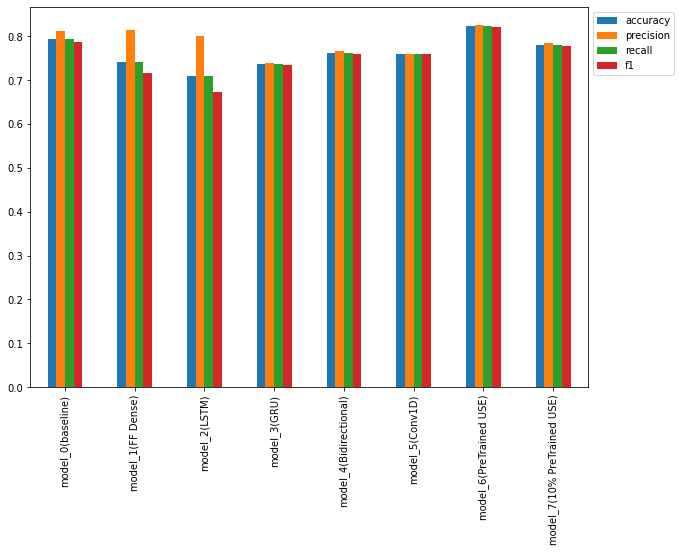

In [ ]:
# visualize compare data
all_model_result.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

## upload logs to tensorboard
for larger scale experiment and more options chechk out weight and biases https://wandb.ai/site

In [ ]:
# uncomment this
# ! tensorboard dev upload --logdir ./model_logs/ \
#     --name "NLP Practice model Hazel" \
#     --description "comparing many diffrerent model architect" \
#     --one_shot # exit uploader once done

# Saving and loading a model

In [ ]:
# choose a model who has best performance, in this case model 6
model_6.save("model_6.h5") # h5 is a file format for hdf5 if you want normal save just type model_6.save("model_6") without h5

In [ ]:
# loading model
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("./model_6.h5",
                                            custom_objects = {"KerasLayer" : hub.KerasLayer}) # bcs we have pre trained custon layer we have to pass this
                                            # if u dont pass the "custom_objects = {"KerasLayer" : hub.KerasLayer}" the tensorflow will not recognize the object

loaded_model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,832,769
Trainable params: 34,945
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(loaded_model_6.predict(val_sentences))))

{'accuracy': 82.28346456692913,
 'f1': 0.8211777225843688,
 'precision': 0.825993734085464,
 'recall': 0.8228346456692913}

In [ ]:
# save model_6 to SavedModel format
model_6.save("model_6_SavedModel") #this will save our model as a file

INFO:tensorflow:Assets written to: model_6_SavedModel/assets


INFO:tensorflow:Assets written to: model_6_SavedModel/assets


In [ ]:
loaded_model_6_SavedModel_format = tf.keras.models.load_model("./model_6_SavedModel")
                                            # custom_objects = {"KerasLayer" : hub.KerasLayer} # we dont need custom objects if saving on SavedModel format

loaded_model_6_SavedModel_format.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,832,769
Trainable params: 34,945
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
calculate_results(val_label, tf.round(tf.squeeze(loaded_model_6_SavedModel_format.predict(val_sentences))))

{'accuracy': 82.28346456692913,
 'f1': 0.8211777225843688,
 'precision': 0.825993734085464,
 'recall': 0.8228346456692913}

In [ ]:
# try another model
model_3.save("model_3")
loaded_model_3 = tf.keras.models.load_model("./model_3")

INFO:tensorflow:Assets written to: model_3/assets


INFO:tensorflow:Assets written to: model_3/assets


In [ ]:
# download the saved files to our local computer
from google.colab import files
files.download('model_6_SavedModel')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# finding the wrong examples


In [ ]:
# Create Dataframe with val sentences and best performing model predictions
val_df = pd.DataFrame({"sentences" : val_sentences, 
                       "label" : val_label,
                       "predictions" : tf.round(tf.squeeze(loaded_model_6_SavedModel_format.predict(val_sentences))),
                       "probability" : tf.squeeze(loaded_model_6_SavedModel_format.predict(val_sentences)),
                       "difference" : tf.abs(val_label - tf.squeeze(loaded_model_6_SavedModel_format.predict(val_sentences)))})
val_df

,sentences,label,predictions,probability,difference
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5,0,0.0,0.097249,0.097249
1,FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday,0,1.0,0.818718,0.818718
2,Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj,1,1.0,0.996184,0.003816
3,@camilacabello97 Internally and externally screaming,1,0.0,0.183657,0.816343
4,Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov,1,1.0,0.711717,0.288283
...,...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.090164,0.090164
758,@SetZorah dad why dont you claim me that mean that not right we look the same same eyes same blood same xbox 360 SMH -.-,0,0.0,0.057866,0.057866
759,FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J,0,1.0,0.910106,0.910106
760,Crack in the path where I wiped out this morning during beach run. Surface wounds on left elbow and right knee. http://t.co/yaqRSximph,0,1.0,0.672115,0.672115


In [ ]:
# find the wrong predictions and sort it by probs
most_wrong = val_df[val_df["label"] != val_df["predictions"]].sort_values("probability",ascending = False)
most_wrong.head(10) # This are false positive

,sentences,label,predictions,probability,difference
628,@noah_anyname That's where the concentration camps and mass murder come in. \n \nEVERY. FUCKING. TIME.,0,1.0,0.946822,0.946822
759,FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J,0,1.0,0.910106,0.910106
303,Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm http://t.co/6GLDwx71DA,0,1.0,0.898380,0.898380
31,? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying,0,1.0,0.894745,0.894745
209,Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0,0,1.0,0.893287,0.893287
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY,0,1.0,0.887793,0.887793
49,@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods,0,1.0,0.852687,0.852687
119,@freefromwolves GodsLove &amp; #thankU brother Danny for RT of NEW VIDEO http://t.co/cybKsXHF7d The Coming Apocalyptic US Earthquake &amp; Tsunami,0,1.0,0.846807,0.846807
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.841546,0.841546
393,@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!,0,1.0,0.820035,0.820035


In [ ]:
most_wrong.tail(10) # this are false negative

,sentences,label,predictions,probability,difference
221,going to redo my nails and watch behind the scenes of desolation of smaug ayyy,1,0.0,0.051209,0.948791
192,New post from @darkreading http://t.co/8eIJDXApnp New SMB Relay Attack Steals User Credentials Over Internet,1,0.0,0.050576,0.949424
535,Rand Paul's Debate Strategy 'demolish Some other bad ideas out there or point out maybe that there are some em... http://t.co/qzdqRBr4Lh,1,0.0,0.050530,0.949470
411,@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren,1,0.0,0.049081,0.950919
59,You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.,1,0.0,0.044888,0.955112
110,Yelp Bolsters Health Care Reviews With Investigative Journalism: Sick and injured patients at a local ER are t... http://t.co/E8aEGOFDY2,1,0.0,0.043899,0.956101
361,Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...,1,0.0,0.039644,0.960356
198,Perspectives on the Grateful Dead: Critical Writings (Contributions to the Study http://t.co/fmu0fnuMxf http://t.co/AgGRyhVXKr,1,0.0,0.033374,0.966626
23,Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube,1,0.0,0.032860,0.967140
38,Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy,1,0.0,0.022359,0.977641


In [ ]:
# find most wrong by its diff
most_wrong_diff = val_df[val_df["label"] != val_df["predictions"]].sort_values("difference",ascending = False)
most_wrong_diff[:20]

,sentences,label,predictions,probability,difference
38,Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy,1,0.0,0.022359,0.977641
23,Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube,1,0.0,0.032860,0.967140
198,Perspectives on the Grateful Dead: Critical Writings (Contributions to the Study http://t.co/fmu0fnuMxf http://t.co/AgGRyhVXKr,1,0.0,0.033374,0.966626
361,Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...,1,0.0,0.039644,0.960356
110,Yelp Bolsters Health Care Reviews With Investigative Journalism: Sick and injured patients at a local ER are t... http://t.co/E8aEGOFDY2,1,0.0,0.043899,0.956101
59,You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.,1,0.0,0.044888,0.955112
411,@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren,1,0.0,0.049081,0.950919
535,Rand Paul's Debate Strategy 'demolish Some other bad ideas out there or point out maybe that there are some em... http://t.co/qzdqRBr4Lh,1,0.0,0.050530,0.949470
192,New post from @darkreading http://t.co/8eIJDXApnp New SMB Relay Attack Steals User Credentials Over Internet,1,0.0,0.050576,0.949424
221,going to redo my nails and watch behind the scenes of desolation of smaug ayyy,1,0.0,0.051209,0.948791


# make a predict on test datasets

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/UtbXLcBIuY
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3


In [ ]:
test_sentences = test_df["text"].to_numpy()
predictions = tf.round(tf.squeeze(model_6.predict(test_sentences)))
probability = tf.squeeze(model_6.predict(test_sentences))

test_result = pd.DataFrame({"sentences" : test_sentences,
                            "predictions" : predictions,
                            "probability" : probability})

test_result

,sentences,predictions,probability
0,Just happened a terrible car crash,1.0,0.534655
1,"Heard about #earthquake is different cities, stay safe everyone.",1.0,0.959528
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",1.0,0.798932
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.965180
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.985561
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn,1.0,0.778219
3259,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power,1.0,0.991704
3260,Green Line derailment in Chicago http://t.co/UtbXLcBIuY,1.0,0.968439
3261,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3,1.0,0.717042


In [ ]:
# saving
test_result.to_csv("test_result.csv")